## Creating a Linear Regression Model Using Laptop Prices Data ##

Imports & Reading in Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import re
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error,  r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
import statsmodels.api as sm

In [2]:
file_path = 'laptop_price.csv'
try:
    df = pd.read_csv(file_path, encoding='ISO-8859-1')
except UnicodeDecodeError:
    df = pd.read_csv(file_path, encoding='utf-8', errors='replace')

In [3]:
df.count()

laptop_ID           1303
Company             1303
Product             1303
TypeName            1303
Inches              1303
ScreenResolution    1303
Cpu                 1303
Ram                 1303
Memory              1303
Gpu                 1303
OpSys               1303
Weight              1303
Price_euros         1303
dtype: int64

In [4]:
df.head(20)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
5,6,Acer,Aspire 3,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4GB,500GB HDD,AMD Radeon R5,Windows 10,2.1kg,400.00
6,7,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16GB,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.04kg,2139.97
7,8,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,256GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,1158.70
8,9,Asus,ZenBook UX430UN,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16GB,512GB SSD,Nvidia GeForce MX150,Windows 10,1.3kg,1495.00
9,10,Acer,Swift 3,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows 10,1.6kg,770.00


In [5]:
df.describe()
#As most of the other data points are stored as strings at this point df.describe does not provide much information here

,laptop_ID,Inches,Price_euros
count,1303.000000,1303.000000,1303.000000
mean,660.155794,15.017191,1123.686992
std,381.172104,1.426304,699.009043
min,1.000000,10.100000,174.000000
25%,331.500000,14.000000,599.000000
50%,659.000000,15.600000,977.000000
75%,990.500000,15.600000,1487.880000
max,1320.000000,18.400000,6099.000000


Data Exploration

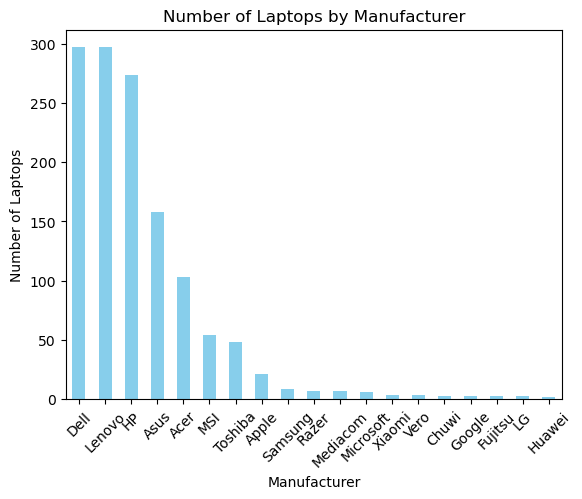

In [6]:
# laptop distribution by manufacturer
manufacturer_counts = df['Company'].value_counts()
#plt.figure(figsize=(10, 6))
manufacturer_counts.plot(kind='bar', color='skyblue')
plt.title("Number of Laptops by Manufacturer")
plt.xlabel("Manufacturer")
plt.ylabel("Number of Laptops")
plt.xticks(rotation=45)
plt.show()

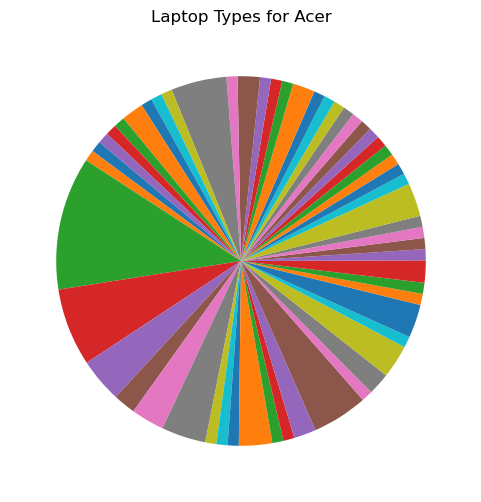

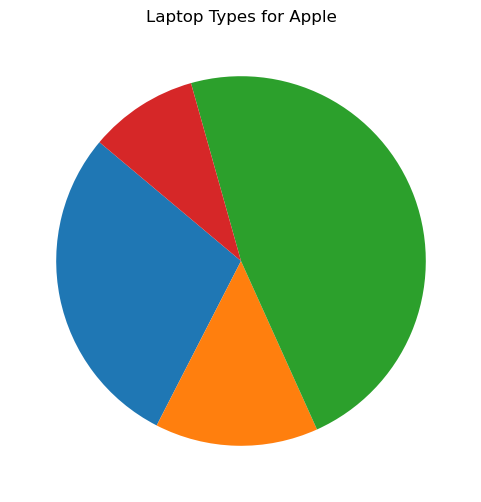

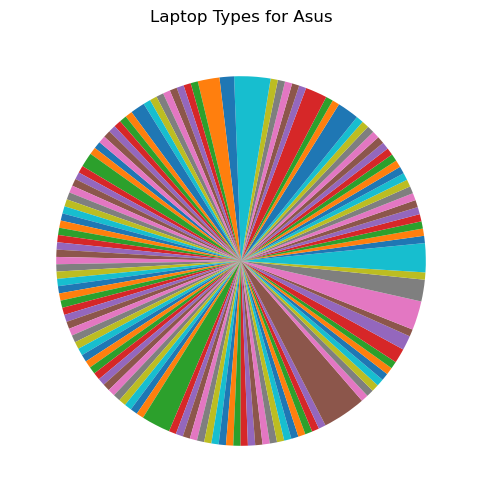

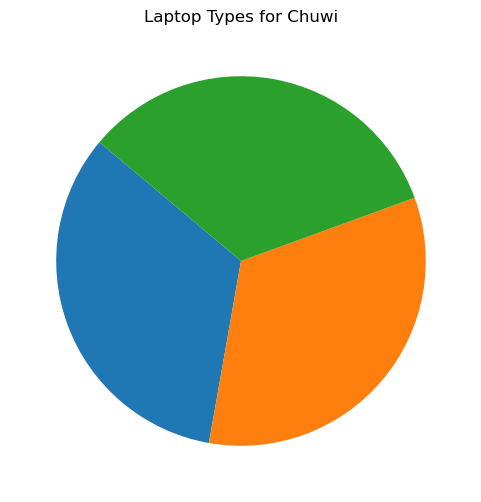

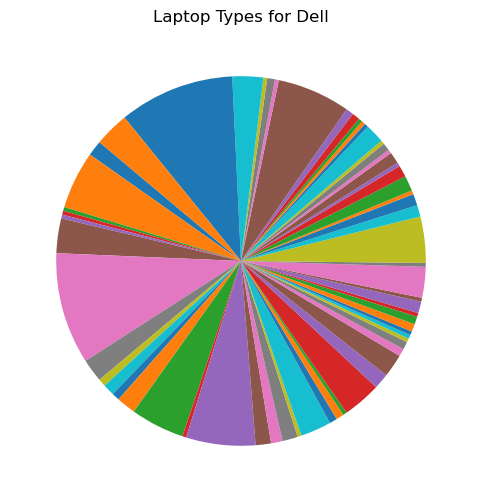

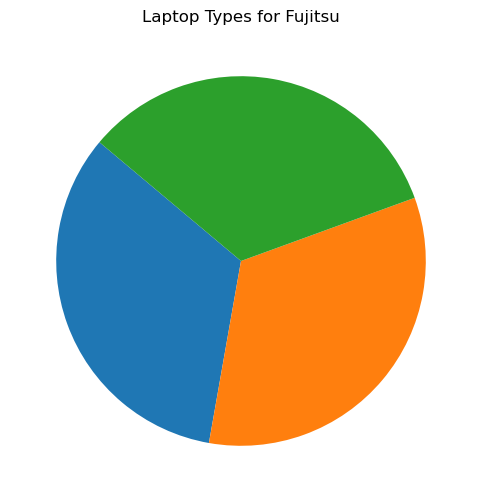

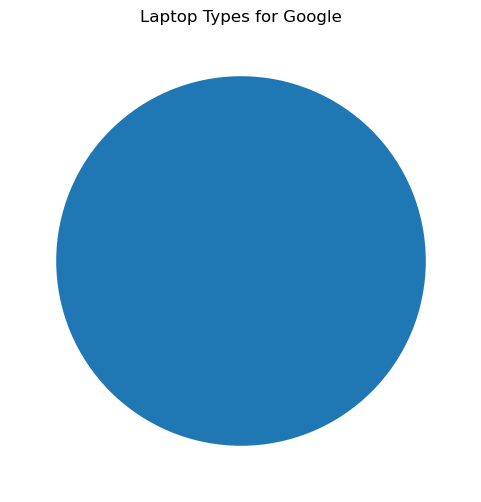

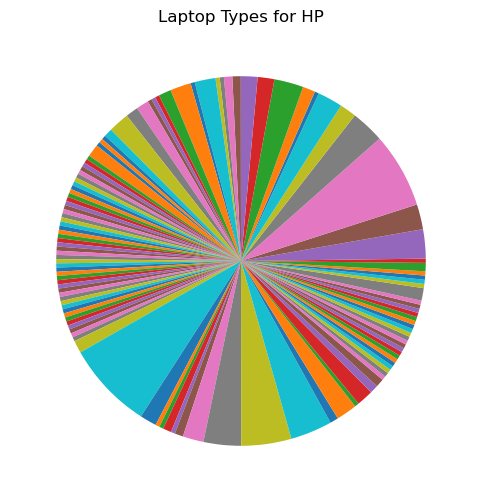

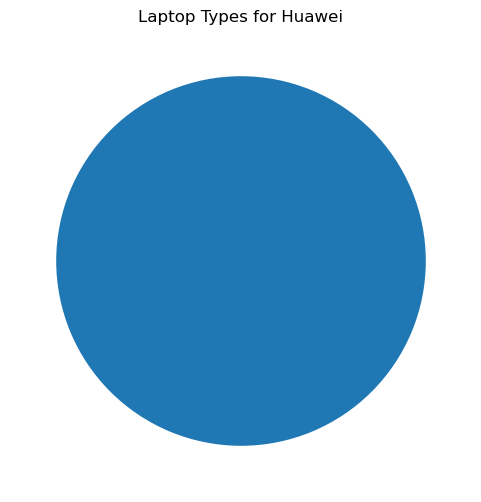

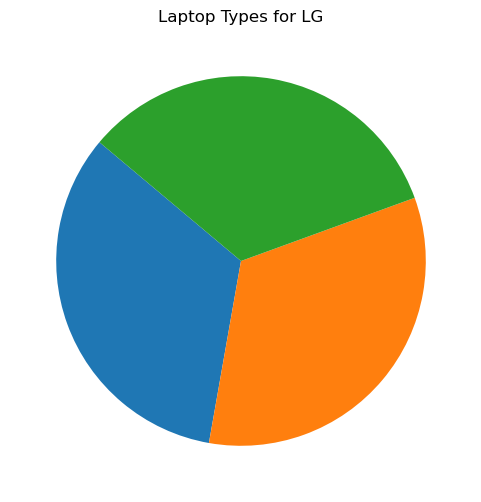

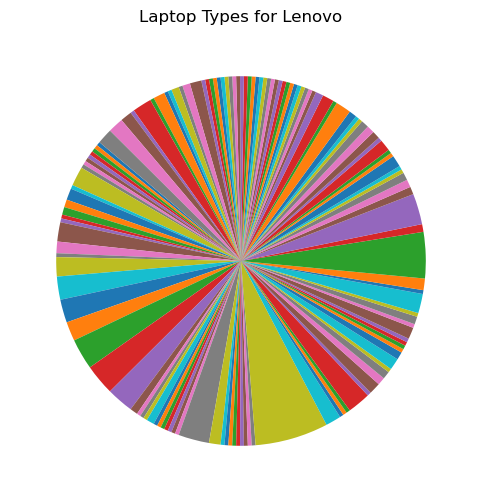

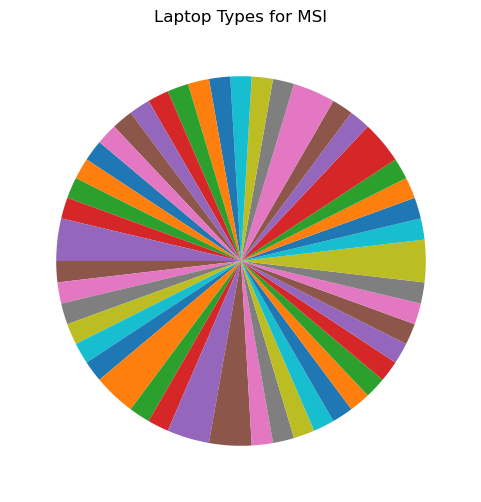

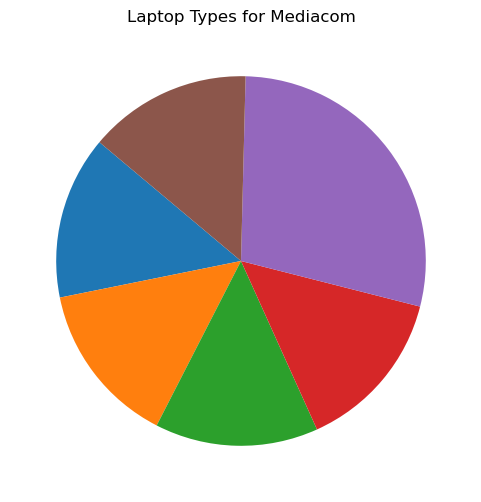

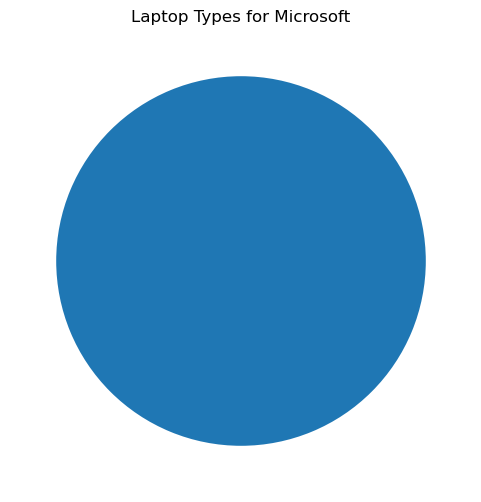

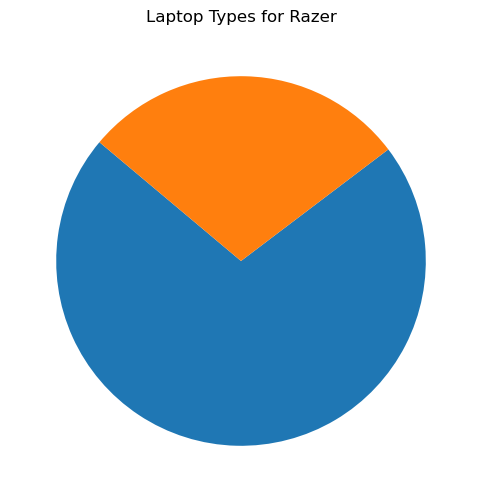

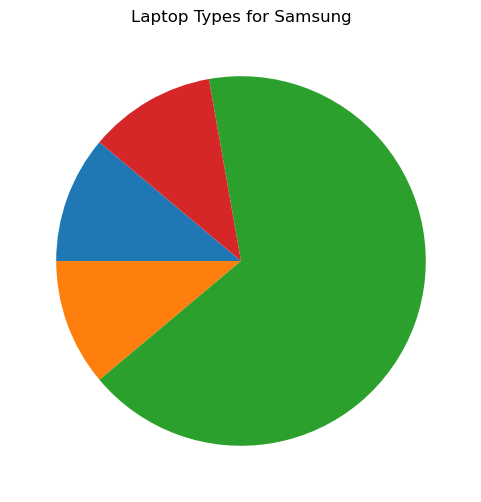

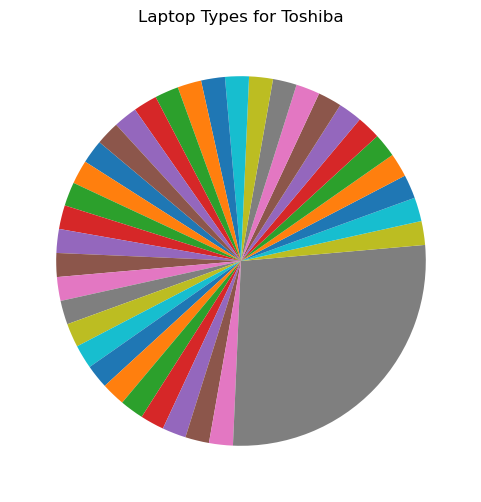

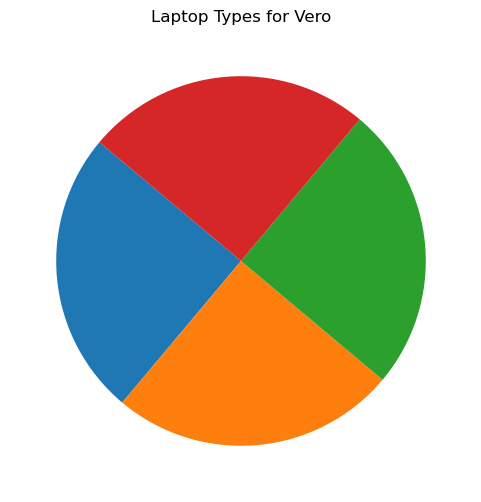

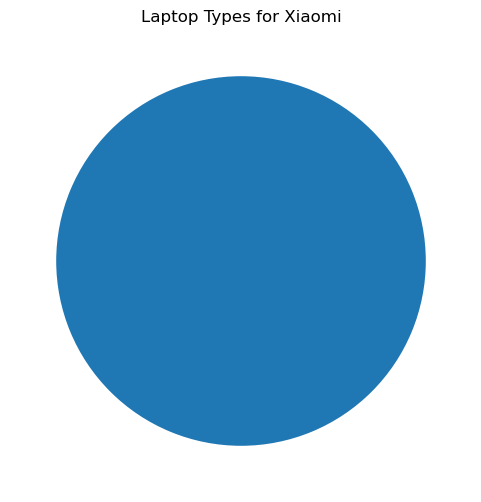

In [7]:
# laptop distribution by model by manufacturer
manufacturer_product_counts = df.groupby(['Company', 'Product']).size().unstack()
for manufacturer in manufacturer_product_counts.index:
    plt.figure(figsize=(6, 6))
    product_counts = manufacturer_product_counts.loc[manufacturer].dropna()
    product_counts.plot(kind='pie', labels=[''] * len(product_counts), startangle=140) 
    # to add chaos
    ## add this line: 
    ##   , autopct='%1.1f%%' 
    ## and remove this one: 
    ##   , labels=[''] * len(product_counts)
    plt.title(f"Laptop Types for {manufacturer}")
    plt.ylabel('')
    plt.show()

<Figure size 1200x900 with 0 Axes>

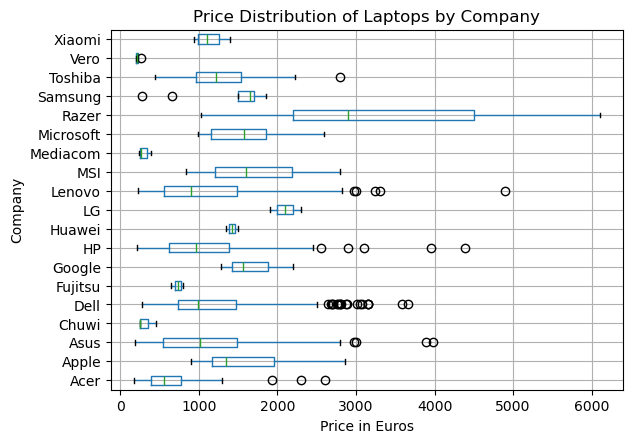

In [8]:
# laptop price by manufacterer
plt.figure(figsize=(12, 9))
df.boxplot(column='Price_euros', by='Company', vert=False)
plt.title("Price Distribution of Laptops by Company")
plt.suptitle('')
plt.xlabel("Price in Euros")
plt.ylabel("Company")
plt.show()

Data Pre-Processing

In [9]:
# removing null values
data = df.dropna()

In [10]:
# checking dropped data
data.count()
# There seems to be no nulls in the dataset :)

laptop_ID           1303
Company             1303
Product             1303
TypeName            1303
Inches              1303
ScreenResolution    1303
Cpu                 1303
Ram                 1303
Memory              1303
Gpu                 1303
OpSys               1303
Weight              1303
Price_euros         1303
dtype: int64

In [11]:
# checking for duplicates
duplicates = data[data.duplicated()]
print("Number of duplicate rows:", duplicates.shape[0])
if not duplicates.empty:
    print("Duplicate rows:")
    print(duplicates[['Company', 'Product', 'TypeName', 'Price_euros']])
else:
    print("No duplicate rows found.")

Number of duplicate rows: 0
No duplicate rows found.


In [12]:
# changing price_euros into dollars for better human understanding
conversion = 1.10 #based on the recent average conversion rate for euro to dollar
data['Price_usd'] = data['Price_euros'] * conversion
print(data[['Price_euros', 'Price_usd']].head())


   Price_euros  Price_usd
0      1339.69   1473.659
1       898.94    988.834
2       575.00    632.500
3      2537.45   2791.195
4      1803.60   1983.960


<Figure size 1200x900 with 0 Axes>

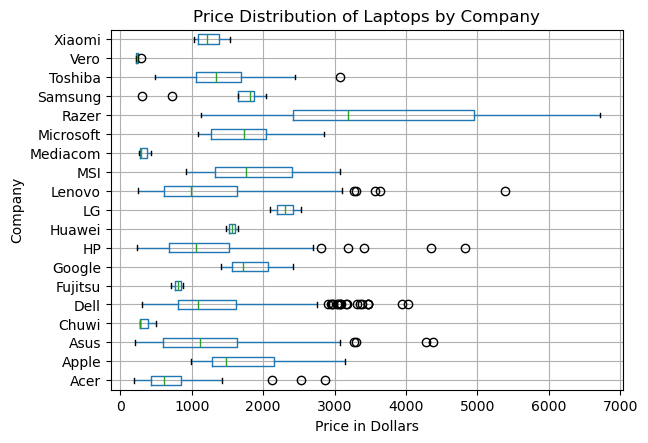

In [13]:
# laptop price by manufacterer in dollars
plt.figure(figsize=(12, 9))
data.boxplot(column='Price_usd', by='Company', vert=False)
plt.title("Price Distribution of Laptops by Company")
plt.suptitle('')
plt.xlabel("Price in Dollars")
plt.ylabel("Company")
plt.show()

In [14]:
# changing string values into numerical floats
data['Ram'] = data['Ram'].apply(lambda x: int(re.sub(r'GB', '', str(x))))
data['Weight'] = data['Weight'].apply(lambda x: float(re.sub(r'kg', '', str(x))))
data.head()
#print(data.dtypes)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Price_usd
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,1473.659
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,988.834
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,632.500
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,2791.195
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,1983.960


In [15]:
# simplifying Screen Resolution data
def extract_screen_features(screen_res):
    ips_panel = 1 if 'IPS' in screen_res else 0
    res_match = re.search(r'(\d{3,4})x(\d{3,4})', screen_res)
    if res_match:
        resolution_x, resolution_y = int(res_match.group(1)), int(res_match.group(2))
    else:
        resolution_x, resolution_y = None, None
    return pd.Series([ips_panel, resolution_x, resolution_y])

Creating Features

In [16]:
# screen resolution feature
data[['IPS_Panel', 'Resolution_X', 'Resolution_Y']] = data['ScreenResolution'].apply(extract_screen_features)

In [17]:
import re
data['SSD'] = data['Memory'].apply(lambda x: int(re.search(r'(\d+)GB (?:SSD|Hybrid)', x).group(1)) if re.search(r'(\d+)GB (?:SSD|Hybrid)', x) else 0)
data['HDD'] = data['Memory'].apply(lambda x: int(re.search(r'(\d+)GB (?:HDD|Hybrid)', x).group(1)) if re.search(r'(\d+)GB (?:HDD|Hybrid)', x) else 0)
data['Flash'] = data['Memory'].apply(lambda x: int(re.search(r'(\d+)GB Flash', x).group(1)) if re.search(r'(\d+)GB Flash', x) else 0)

In [18]:
# used before hybrid column was removed

# count = 0
# print('hybrid')
# for i, value in enumerate(data['Hybrid']):
#     if value > 0:
#         print(data.iloc[i])
#         count += 1
#         if count == 5:
#             break
# print('flash')
# for i, value in enumerate(data['Flash']):
#     if value > 0:
#         print(data.iloc[i])
#         count += 1
#         if count == 5:
#             break

In [19]:
data['Has_OS'] = data['OpSys'].apply(lambda x: 0 if x == 'No OS' else 1)
print(data['Has_OS'])

0       1
1       1
2       0
3       1
4       1
       ..
1298    1
1299    1
1300    1
1301    1
1302    1
Name: Has_OS, Length: 1303, dtype: int64


In [20]:
# data[['CPU_Brand', 'CPU_Model']] = data['Cpu'].str.extract(r'(^\w+)\s(.+)', expand=True)
# print(data[['CPU_Brand', 'CPU_Model']])
# Because the Logistic Regression model takes only values as input, 
# the initial method has been scrapped and instead I will be just checking whether or not the laptop has a CPU.
data['has_CPU'] = data['Cpu'].notna().astype(int)


In [21]:
# data[['GPU_Brand', 'GPU_Model']] = data['Gpu'].str.extract(r'(^\w+)\s(.+)', expand=True)
# print(data[['GPU_Brand', 'GPU_Model']])
data['has_GPU'] = data['Gpu'].notna().astype(int)


In [22]:
data['Memory_Amount'] = data['Memory'].str.extract(r'(\d+)', expand=False).astype(float)
data['Memory_Unit'] = data['Memory'].str.extract(r'(GB|TB)', expand=False)
data['Memory_in_GB'] = data.apply(lambda x: x['Memory_Amount'] * 1024 if x['Memory_Unit'] == 'TB' else x['Memory_Amount'], axis=1)
# Delete Storage_Amount and Storage Unit rows - saved in Storage_in_GB
data = data.drop(columns=['Memory_Amount', 'Memory_Unit'])

print(data[['Memory_in_GB']])

      Memory_in_GB
0            128.0
1            128.0
2            256.0
3            512.0
4            256.0
...            ...
1298         128.0
1299         512.0
1300          64.0
1301        1024.0
1302         500.0

[1303 rows x 1 columns]


In [23]:
data = pd.get_dummies(data, columns=['Company', 'TypeName'], drop_first=True)

In [24]:
# Dropping non-numeric and already featurized columns
data = data.drop(columns=['Product', 'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys'])

In [25]:
# converting boolean values into int for numeric
for column in data.columns:
    if data[column].dtype == 'bool':
        data[column] = data[column].astype(int)

In [26]:
data.head(20)

,laptop_ID,Inches,Weight,Price_euros,Price_usd,IPS_Panel,Resolution_X,Resolution_Y,SSD,HDD,...,Company_Razer,Company_Samsung,Company_Toshiba,Company_Vero,Company_Xiaomi,TypeName_Gaming,TypeName_Netbook,TypeName_Notebook,TypeName_Ultrabook,TypeName_Workstation
0,1,13.3,1.37,1339.69,1473.659,1,2560,1600,128,0,...,0,0,0,0,0,0,0,0,1,0
1,2,13.3,1.34,898.94,988.834,0,1440,900,0,0,...,0,0,0,0,0,0,0,0,1,0
2,3,15.6,1.86,575.00,632.500,0,1920,1080,256,0,...,0,0,0,0,0,0,0,1,0,0
3,4,15.4,1.83,2537.45,2791.195,1,2880,1800,512,0,...,0,0,0,0,0,0,0,0,1,0
4,5,13.3,1.37,1803.60,1983.960,1,2560,1600,256,0,...,0,0,0,0,0,0,0,0,1,0
5,6,15.6,2.10,400.00,440.000,0,1366,768,0,500,...,0,0,0,0,0,0,0,1,0,0
6,7,15.4,2.04,2139.97,2353.967,1,2880,1800,0,0,...,0,0,0,0,0,0,0,0,1,0
7,8,13.3,1.34,1158.70,1274.570,0,1440,900,0,0,...,0,0,0,0,0,0,0,0,1,0
8,9,14.0,1.30,1495.00,1644.500,0,1920,1080,512,0,...,0,0,0,0,0,0,0,0,1,0
9,10,14.0,1.60,770.00,847.000,1,1920,1080,256,0,...,0,0,0,0,0,0,0,0,1,0


In [27]:
data.dtypes

laptop_ID                 int64
Inches                  float64
Weight                  float64
Price_euros             float64
Price_usd               float64
IPS_Panel                 int64
Resolution_X              int64
Resolution_Y              int64
SSD                       int64
HDD                       int64
Flash                     int64
Has_OS                    int64
has_CPU                   int32
has_GPU                   int32
Memory_in_GB            float64
Company_Apple             int32
Company_Asus              int32
Company_Chuwi             int32
Company_Dell              int32
Company_Fujitsu           int32
Company_Google            int32
Company_HP                int32
Company_Huawei            int32
Company_LG                int32
Company_Lenovo            int32
Company_MSI               int32
Company_Mediacom          int32
Company_Microsoft         int32
Company_Razer             int32
Company_Samsung           int32
Company_Toshiba           int32
Company_

In [28]:
data.columns

Index(['laptop_ID', 'Inches', 'Weight', 'Price_euros', 'Price_usd',
       'IPS_Panel', 'Resolution_X', 'Resolution_Y', 'SSD', 'HDD', 'Flash',
       'Has_OS', 'has_CPU', 'has_GPU', 'Memory_in_GB', 'Company_Apple',
       'Company_Asus', 'Company_Chuwi', 'Company_Dell', 'Company_Fujitsu',
       'Company_Google', 'Company_HP', 'Company_Huawei', 'Company_LG',
       'Company_Lenovo', 'Company_MSI', 'Company_Mediacom',
       'Company_Microsoft', 'Company_Razer', 'Company_Samsung',
       'Company_Toshiba', 'Company_Vero', 'Company_Xiaomi', 'TypeName_Gaming',
       'TypeName_Netbook', 'TypeName_Notebook', 'TypeName_Ultrabook',
       'TypeName_Workstation'],
      dtype='object')

### Linear Regression ###

##### Experiment 1 #####

In [29]:
# I have not included the factor product as the variety in products would lead to inflated data columns, 
# especially when trying to have numerical values for columns.
X = data[['Inches', 'Weight', 'IPS_Panel', 'Resolution_X', 'Resolution_Y', 
          'SSD', 'HDD', 'Flash', 'Has_OS', 'Memory_in_GB', 'Company_Apple', 
          'Company_Asus', 'Company_Chuwi', 'Company_Dell', 'Company_Fujitsu', 
          'Company_Google', 'Company_HP', 'Company_Huawei', 'Company_LG', 
          'Company_Lenovo', 'Company_MSI', 'Company_Mediacom', 'Company_Microsoft', 
          'Company_Razer', 'Company_Samsung', 'Company_Toshiba', 'Company_Vero', 
          'Company_Xiaomi', 'TypeName_Gaming', 'TypeName_Netbook', 'TypeName_Notebook', 
          'TypeName_Ultrabook', 'TypeName_Workstation']]
Y = data['Price_euros']

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 13)
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {Y_train.shape}")
print(f"y_test shape: {Y_test.shape}")

X_train shape: (912, 33)
X_test shape: (391, 33)
y_train shape: (912,)
y_test shape: (391,)


In [31]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regression', LinearRegression())
])

In [32]:
pipeline.fit(X_train, Y_train)
Y_pred = pipeline.predict(X_test)

In [33]:
r2 = r2_score(Y_test, Y_pred)
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))

print(f'Linear Regression R^2 Score: {r2:.4f}')
print(f'Linear Regression RMSE: {rmse:.2f} Euros')

Linear Regression R^2 Score: 0.5867
Linear Regression RMSE: 509.98 Euros


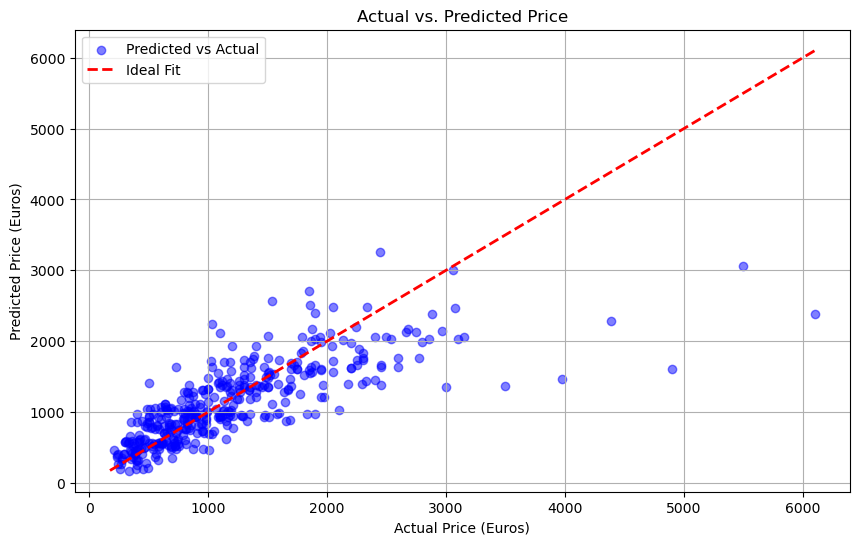

In [34]:
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, Y_pred, color='blue', alpha=0.5, label='Predicted vs Actual')
plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], color='red', linestyle='--', linewidth=2, label='Ideal Fit')
plt.xlabel('Actual Price (Euros)')
plt.ylabel('Predicted Price (Euros)')
plt.title('Actual vs. Predicted Price')
plt.legend()
plt.grid(True)
plt.show()

In [35]:
poly_ridge_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('poly_features', PolynomialFeatures(degree=3, include_bias=True)),
    ('ridge', Ridge(alpha=200.0))
])

In [36]:
poly_ridge_pipeline.fit(X_train, Y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('poly_features', PolynomialFeatures(degree=3)),
                ('ridge', Ridge(alpha=200.0))])

In [37]:
Y_poly_ridge_pred = poly_ridge_pipeline.predict(X_test)

In [38]:
r2_poly_ridge = r2_score(Y_test, Y_poly_ridge_pred)
rmse_poly_ridge = np.sqrt(mean_squared_error(Y_test, Y_poly_ridge_pred))

In [39]:
print(f'Polynomial Ridge R^2 Score: {r2_poly_ridge:.4f}')
print(f'Polynomial Ridge RMSE: {rmse_poly_ridge:.2f} Euros')

Polynomial Ridge R^2 Score: 0.7016
Polynomial Ridge RMSE: 433.33 Euros


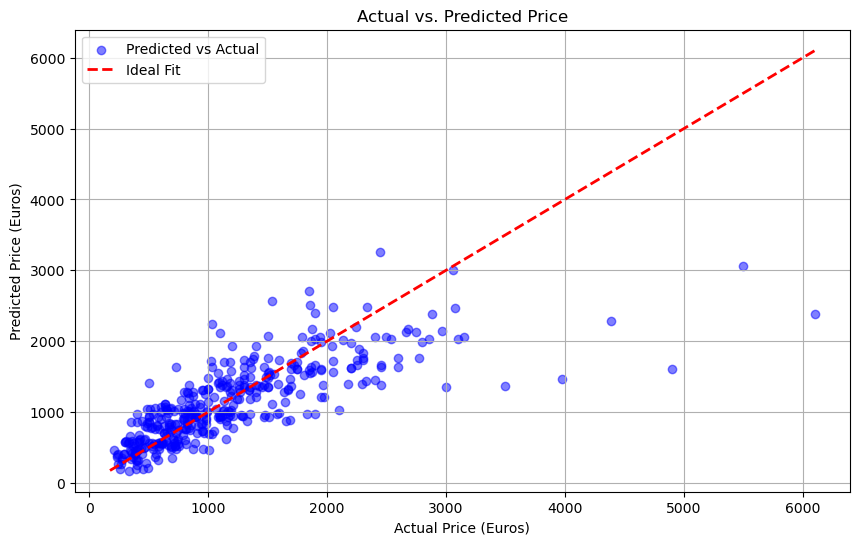

In [40]:
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, Y_pred, color='blue', alpha=0.5, label='Predicted vs Actual')
plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], color='red', linestyle='--', linewidth=2, label='Ideal Fit')
plt.xlabel('Actual Price (Euros)')
plt.ylabel('Predicted Price (Euros)')
plt.title('Actual vs. Predicted Price')
plt.legend()
plt.grid(True)
plt.show()

##### Experiment 2 #####

Here I will be removing the company as a feature for the graph. Due to the high number of companies, this removal may help clear some noise of the feature.

In [41]:
X = data[['Inches', 'Weight', 'IPS_Panel', 'Resolution_X', 'Resolution_Y', 'SSD', 'HDD', 'Flash', 'Has_OS', 'Memory_in_GB', 
          'TypeName_Gaming', 'TypeName_Netbook', 'TypeName_Notebook', 'TypeName_Ultrabook', 'TypeName_Workstation']]
Y = data['Price_euros']

In [42]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 13)
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {Y_train.shape}")
print(f"y_test shape: {Y_test.shape}")

X_train shape: (912, 15)
X_test shape: (391, 15)
y_train shape: (912,)
y_test shape: (391,)


In [43]:
poly_ridge_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('poly_features', PolynomialFeatures(degree=3, include_bias=False)),
    ('ridge', Ridge(alpha=4300.0))
])

In [44]:
poly_ridge_pipeline.fit(X_train, Y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('poly_features',
                 PolynomialFeatures(degree=3, include_bias=False)),
                ('ridge', Ridge(alpha=4300.0))])

In [45]:
Y_poly_ridge_pred = poly_ridge_pipeline.predict(X_test)

In [46]:
r2_poly_ridge = r2_score(Y_test, Y_poly_ridge_pred)
rmse_poly_ridge = np.sqrt(mean_squared_error(Y_test, Y_poly_ridge_pred))

print(f'Polynomial Ridge R^2 Score: {r2_poly_ridge:.4f}')
print(f'Polynomial Ridge RMSE: {rmse_poly_ridge:.2f} Euros')

Polynomial Ridge R^2 Score: 0.6292
Polynomial Ridge RMSE: 483.08 Euros


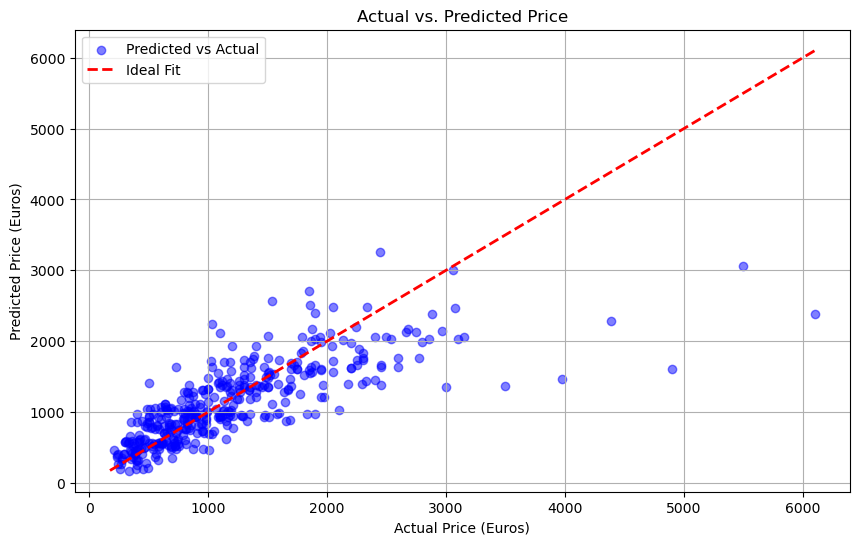

In [47]:
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, Y_pred, color='blue', alpha=0.5, label='Predicted vs Actual')
plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], color='red', linestyle='--', linewidth=2, label='Ideal Fit')
plt.xlabel('Actual Price (Euros)')
plt.ylabel('Predicted Price (Euros)')
plt.title('Actual vs. Predicted Price')
plt.legend()
plt.grid(True)
plt.show()

#### Experiment 3 #####

Using Ordinary Least Squares for regression

In [48]:
X = data[['Inches', 'Weight', 'IPS_Panel', 'Resolution_X', 'Resolution_Y', 
          'SSD', 'HDD', 'Flash', 'Has_OS', 'Memory_in_GB', 'Company_Apple', 
          'Company_Asus', 'Company_Chuwi', 'Company_Dell', 'Company_Fujitsu', 
          'Company_Google', 'Company_HP', 'Company_Huawei', 'Company_LG', 
          'Company_Lenovo', 'Company_MSI', 'Company_Mediacom', 'Company_Microsoft', 
          'Company_Razer', 'Company_Samsung', 'Company_Toshiba', 'Company_Vero', 
          'Company_Xiaomi', 'TypeName_Gaming', 'TypeName_Netbook', 'TypeName_Notebook', 
          'TypeName_Ultrabook', 'TypeName_Workstation']]
Y = data['Price_euros']

In [49]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 13)
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {Y_train.shape}")
print(f"y_test shape: {Y_test.shape}")

X_train shape: (912, 33)
X_test shape: (391, 33)
y_train shape: (912,)
y_test shape: (391,)


In [50]:
model = sm.OLS(Y_train, X_train).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:            Price_euros   R-squared (uncentered):                   0.918
Model:                            OLS   Adj. R-squared (uncentered):              0.915
Method:                 Least Squares   F-statistic:                              298.0
Date:                Sat, 02 Nov 2024   Prob (F-statistic):                        0.00
Time:                        00:43:34   Log-Likelihood:                         -6676.0
No. Observations:                 912   AIC:                                  1.342e+04
Df Residuals:                     879   BIC:                                  1.358e+04
Df Model:                          33                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [51]:
print(f"R-squared: {model.rsquared:.4f}")
mae = mean_absolute_error(Y_test, Y_pred).round(2)
mse = mean_squared_error(Y_test, Y_pred).round(2)
mape = ((np.mean(np.abs(Y_test-Y_pred)/Y_test) * 100)/len(df)).round(2)
print(f"MAE: {mae}\nMSE:{mse} \nMAPE:{mape}%.")

R-squared: 0.9180
MAE: 320.45
MSE:260078.14 
MAPE:0.02%.


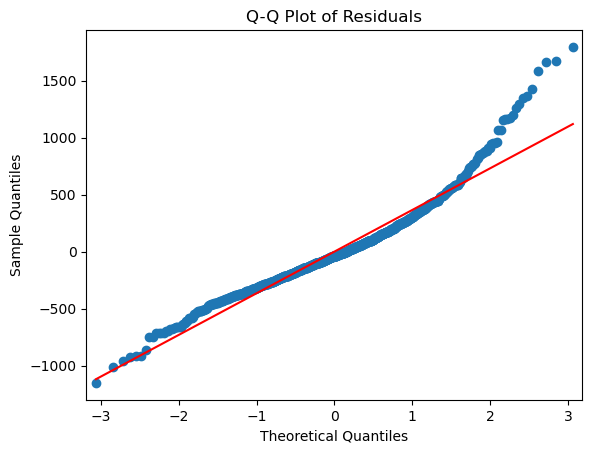

In [73]:
sm.qqplot(model.resid, line='s')
plt.title('Q-Q Plot of Residuals')
plt.show()

In [52]:
## Removing insiginificant features
X = X.drop(['IPS_Panel', 'Resolution_X', 'Resolution_Y', 'HDD'], axis=1)

In [53]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 13)

In [54]:
Ord_least_sq = sm.OLS(Y_train, X_train).fit()

In [55]:
print(Ord_least_sq.summary())

                                 OLS Regression Results                                
Dep. Variable:            Price_euros   R-squared (uncentered):                   0.904
Model:                            OLS   Adj. R-squared (uncentered):              0.901
Method:                 Least Squares   F-statistic:                              288.0
Date:                Sat, 02 Nov 2024   Prob (F-statistic):                        0.00
Time:                        00:43:34   Log-Likelihood:                         -6745.8
No. Observations:                 912   AIC:                                  1.355e+04
Df Residuals:                     883   BIC:                                  1.369e+04
Df Model:                          29                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [72]:
print(f"R-squared: {Ord_least_sq.rsquared:.4f}")
mae = mean_absolute_error(Y_test, Y_pred).round(2)
mse = mean_squared_error(Y_test, Y_pred).round(2)
mape = ((np.mean(np.abs(Y_test-Y_pred)/Y_test) * 100)/len(df)).round(2)
print(f"MAE: {mae}\nMSE:{mse} \nMAPE:{mape}%.")

R-squared: 0.9044
MAE: 270.48
MSE:132031.2 
MAPE:0.02%.


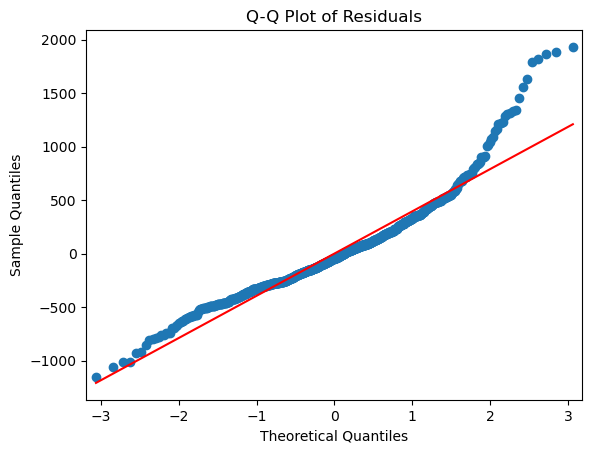

In [58]:
sm.qqplot(Ord_least_sq.resid, line='s')
plt.title('Q-Q Plot of Residuals')
plt.show()

#### Experiment 4 ####

removing outliers in the data

In [59]:
d_out = data[data['Price_euros'] <= 3000]

In [60]:
X = d_out[['Inches', 'Weight', 'IPS_Panel', 'Resolution_X', 'Resolution_Y', 
          'SSD', 'HDD', 'Flash', 'Has_OS', 'Memory_in_GB', 'Company_Apple', 
          'Company_Asus', 'Company_Chuwi', 'Company_Dell', 'Company_Fujitsu', 
          'Company_Google', 'Company_HP', 'Company_Huawei', 'Company_LG', 
          'Company_Lenovo', 'Company_MSI', 'Company_Mediacom', 'Company_Microsoft', 
          'Company_Razer', 'Company_Samsung', 'Company_Toshiba', 'Company_Vero', 
          'Company_Xiaomi', 'TypeName_Gaming', 'TypeName_Netbook', 'TypeName_Notebook', 
          'TypeName_Ultrabook', 'TypeName_Workstation']]
Y = d_out['Price_euros']

In [61]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 13)
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {Y_train.shape}")
print(f"y_test shape: {Y_test.shape}")

X_train shape: (898, 33)
X_test shape: (386, 33)
y_train shape: (898,)
y_test shape: (386,)


In [62]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regression', LinearRegression())
])

In [63]:
pipeline.fit(X_train, Y_train)
Y_pred = pipeline.predict(X_test)

In [64]:
r2 = r2_score(Y_test, Y_pred)
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))

print(f'Linear Regression R^2 Score: {r2:.4f}')
print(f'Linear Regression RMSE: {rmse:.2f} Euros')

Linear Regression R^2 Score: 0.6628
Linear Regression RMSE: 363.36 Euros


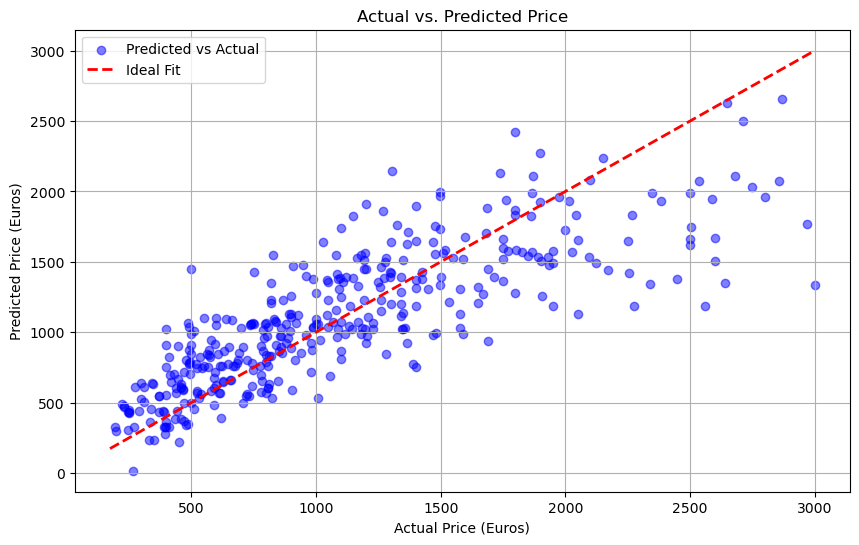

In [65]:
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, Y_pred, color='blue', alpha=0.5, label='Predicted vs Actual')
plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], color='red', linestyle='--', linewidth=2, label='Ideal Fit')
plt.xlabel('Actual Price (Euros)')
plt.ylabel('Predicted Price (Euros)')
plt.title('Actual vs. Predicted Price')
plt.legend()
plt.grid(True)
plt.show()

In [66]:
poly_ridge_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('poly_features', PolynomialFeatures(degree=2, include_bias=True)),
    ('ridge', Ridge(alpha=15.0))
])

In [67]:
poly_ridge_pipeline.fit(X_train, Y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('poly_features', PolynomialFeatures()),
                ('ridge', Ridge(alpha=15.0))])

In [68]:
Y_poly_ridge_pred = poly_ridge_pipeline.predict(X_test)

In [69]:
r2_poly_ridge = r2_score(Y_test, Y_poly_ridge_pred)
rmse_poly_ridge = np.sqrt(mean_squared_error(Y_test, Y_poly_ridge_pred))

In [70]:
print(f'Polynomial Ridge R^2 Score: {r2_poly_ridge:.4f}')
print(f'Polynomial Ridge RMSE: {rmse_poly_ridge:.2f} Euros')

Polynomial Ridge R^2 Score: 0.7354
Polynomial Ridge RMSE: 321.89 Euros


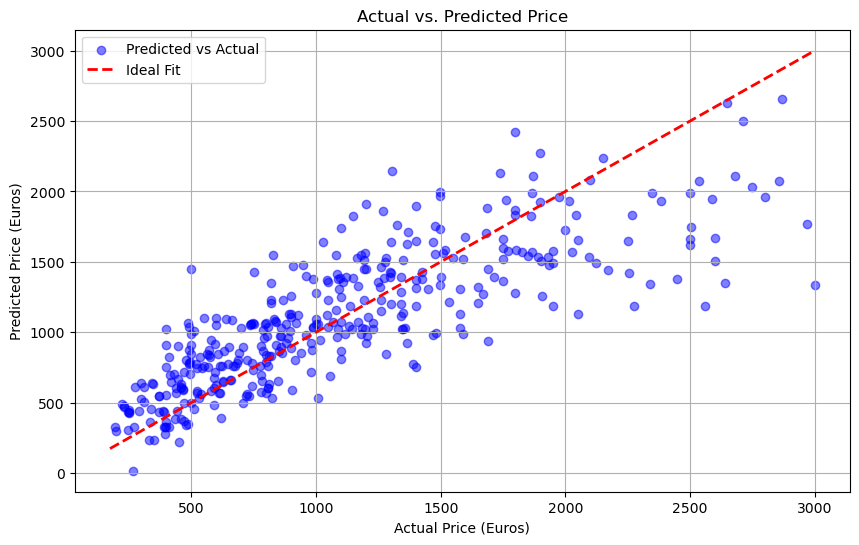

In [71]:
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, Y_pred, color='blue', alpha=0.5, label='Predicted vs Actual')
plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], color='red', linestyle='--', linewidth=2, label='Ideal Fit')
plt.xlabel('Actual Price (Euros)')
plt.ylabel('Predicted Price (Euros)')
plt.title('Actual vs. Predicted Price')
plt.legend()
plt.grid(True)
plt.show()